In [1]:
# Dataset @ https: //finance.yahoo.com/quote/MFST/history/

In [3]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9531,2024-01-08,369.299988,375.200012,369.010010,374.690002,374.690002,23134000
9532,2024-01-09,372.010010,375.989990,371.190002,375.790009,375.790009,20830000
9533,2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200
9534,2024-01-11,386.000000,390.679993,380.380005,384.630005,384.630005,27850800


In [4]:
# just keeping date and the closing value

df = df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9531,2024-01-08,374.690002
9532,2024-01-09,375.790009
9533,2024-01-10,382.769989
9534,2024-01-11,384.630005


In [5]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9531    2024-01-08
9532    2024-01-09
9533    2024-01-10
9534    2024-01-11
9535    2024-01-12
Name: Date, Length: 9536, dtype: object

In [6]:
# dtype of Date colum is object not datetime

import datetime

# create a function that will take string values of date and retun a date in correct datetime format
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])   # these values of split are string currently so changing it to integer
    return datetime.datetime(year=year, month=month, day=day)

# now test out our function by creating an object
datetime_object = str_to_datetime('1986-03-19')
datetime_object


datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
# now apply this function to our entire date column
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\majil\AppData\Local\Temp\ipykernel_6404\627499606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9531   2024-01-08
9532   2024-01-09
9533   2024-01-10
9534   2024-01-11
9535   2024-01-12
Name: Date, Length: 9536, dtype: datetime64[ns]

In [8]:
# now the dtype is datetime

In [9]:
# now make our Date coulumn as index
df.index = df.pop('Date')      # pop: removes Date column from DF, # then df.index is assigning removed Date column as a new index
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-08,374.690002
2024-01-09,375.790009
2024-01-10,382.769989


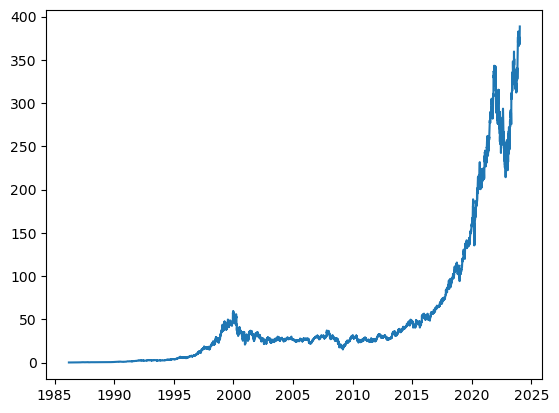

In [10]:
# now lets plot our data
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [11]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-08,374.690002
2024-01-09,375.790009
2024-01-10,382.769989


In [38]:
# now because we are using LSTM model, we need to convert this into a supervised learning problem
# we will do this by making a new function 

def window_data(data, n=3):
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    # print(windowed_data)
    return windowed_data.dropna()

windowed_df = window_data(df,n=3)
# windowed_df      # 1st Try, i ran code with this windowed_df

# 2nd Try
# I am making these changes after visualizing the prediction for validation and test data, while keep all the data from 1998 until today, and the result is very off
# so considering only last year data. Seems like LSTM models are not very good at extrapolating data is data is very old

# for only last year data
windowed_df = windowed_df['2023-01-12':]
windowed_df


,Target-3,Target-2,Target-1,Target
Date,,,,
2023-01-12,227.119995,228.850006,235.770004,238.509995
2023-01-13,228.850006,235.770004,238.509995,239.229996
2023-01-17,235.770004,238.509995,239.229996,240.350006
2023-01-18,238.509995,239.229996,240.350006,235.809998
2023-01-19,239.229996,240.350006,235.809998,231.929993
...,...,...,...,...
2024-01-08,370.600006,367.940002,367.750000,374.690002
2024-01-09,367.940002,367.750000,374.690002,375.790009
2024-01-10,367.750000,374.690002,375.790009,382.769989


In [39]:
# now we need to convert this into numpy array so that we can feed it to TensorFlow model

import numpy as np

# in order to do that, we will create a function, we need Date, input X: That is 3D Tensor, and y: output vector or target value
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = windowed_dataframe.index.to_numpy()
    
    middle_matrix = df_as_np[:,0:-1]   # all rows, column from 1st to 2nd last,(leave last column)
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) # len(dates): will decide the number of rows
                                                                      # middel_matrix.shape[1]: will decide the number of columns
                                                                      # 1: because we are just using one varible i.e. 'close' in our LSTM i.e univariate forecasting, if we are doing multivariate LSTM then we can choose 2, 3,..
                              
    y = df_as_np[:,-1]  # -1: is to pick last column
    
    return dates, X.astype(np.float32), y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)      
                              
dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

In [40]:
dates

array(['2023-01-12T00:00:00.000000000', '2023-01-13T00:00:00.000000000',
       '2023-01-17T00:00:00.000000000', '2023-01-18T00:00:00.000000000',
       '2023-01-19T00:00:00.000000000', '2023-01-20T00:00:00.000000000',
       '2023-01-23T00:00:00.000000000', '2023-01-24T00:00:00.000000000',
       '2023-01-25T00:00:00.000000000', '2023-01-26T00:00:00.000000000',
       '2023-01-27T00:00:00.000000000', '2023-01-30T00:00:00.000000000',
       '2023-01-31T00:00:00.000000000', '2023-02-01T00:00:00.000000000',
       '2023-02-02T00:00:00.000000000', '2023-02-03T00:00:00.000000000',
       '2023-02-06T00:00:00.000000000', '2023-02-07T00:00:00.000000000',
       '2023-02-08T00:00:00.000000000', '2023-02-09T00:00:00.000000000',
       '2023-02-10T00:00:00.000000000', '2023-02-13T00:00:00.000000000',
       '2023-02-14T00:00:00.000000000', '2023-02-15T00:00:00.000000000',
       '2023-02-16T00:00:00.000000000', '2023-02-17T00:00:00.000000000',
       '2023-02-21T00:00:00.000000000', '2023-02-22

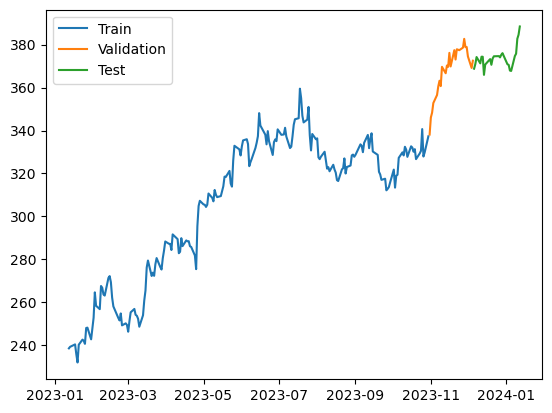

In [41]:
# now we are going to split the data in train, validation and testing partition
# train will train the model, # validation will help train the model, # test is used to evaluate the performance of the model

# we need 2 integers to help with the split

q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# visualize the data
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])


In [42]:
# now import from tenserlfow

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model = Sequential([layers.Input((3,1)),           #3: 3 days in the past #1: only one feature (only univariate feature) # this is input layer, now we will do LSTM layers
                    layers.LSTM(64),                #64: number of neurons for LSTM, bigger the number more complicated the model is, more prone to overfitting
                    layers.Dense(32, activation='relu'),     # now stacked Dense Layer
                    layers.Dense(32,  activation='relu'),
                    layers.Dense(1)])                     # output layer of model #activation = 'linear' by default, which is desired here # 1: because we are predicting next one value
                
# to compile the model, we must set the loss function
# the loss function we want to minimize is the mean squared error 

model.compile(loss='mse',
              optimizer= Adam(learning_rate=0.001),
              metrics = ['mean_absolute_error'])          # specify new metrics: this will tell on average we are off   # we need to minimize 'mse' but look at this metrics as well
    
# we are now ready to fix the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)   # 100: means 100 runs through the dataset


Epoch 1/100
7/7 [==============================] - 2s 59ms/step - loss: 94143.2812 - mean_absolute_error: 305.0479 - val_loss: 134910.8125 - val_mean_absolute_error: 367.1243
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 93879.2109 - mean_absolute_error: 304.6141 - val_loss: 134527.7031 - val_mean_absolute_error: 366.6021
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 93547.0312 - mean_absolute_error: 304.0665 - val_loss: 134133.6562 - val_mean_absolute_error: 366.0642
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 93189.0938 - mean_absolute_error: 303.4754 - val_loss: 133627.0156 - val_mean_absolute_error: 365.3716
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 92715.3047 - mean_absolute_error: 302.6963 - val_loss: 132951.7344 - val_mean_absolute_error: 364.4463
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 92100.1406 - mean_absolute_error: 301.6796 - val_loss: 132

7/7 [==============================] - 0s 5ms/step - loss: 30.5969 - mean_absolute_error: 4.2974 - val_loss: 475.9565 - val_mean_absolute_error: 20.4695
Epoch 98/100
7/7 [==============================] - 0s 5ms/step - loss: 37.7984 - mean_absolute_error: 4.9228 - val_loss: 493.2506 - val_mean_absolute_error: 20.9209
Epoch 99/100
7/7 [==============================] - 0s 5ms/step - loss: 34.3581 - mean_absolute_error: 4.5928 - val_loss: 538.8811 - val_mean_absolute_error: 22.1636
Epoch 100/100
7/7 [==============================] - 0s 5ms/step - loss: 32.8967 - mean_absolute_error: 4.4530 - val_loss: 573.8038 - val_mean_absolute_error: 23.0106


7/7 [==============================] - 0s 1ms/step


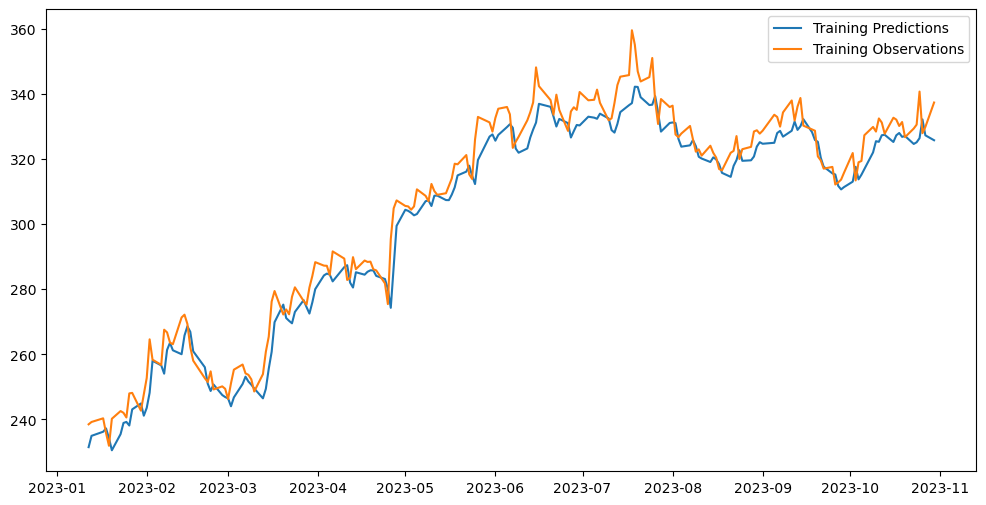

In [49]:
# training prediction

train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(12,6))   # this has to be set before other plot commands
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 14ms/step


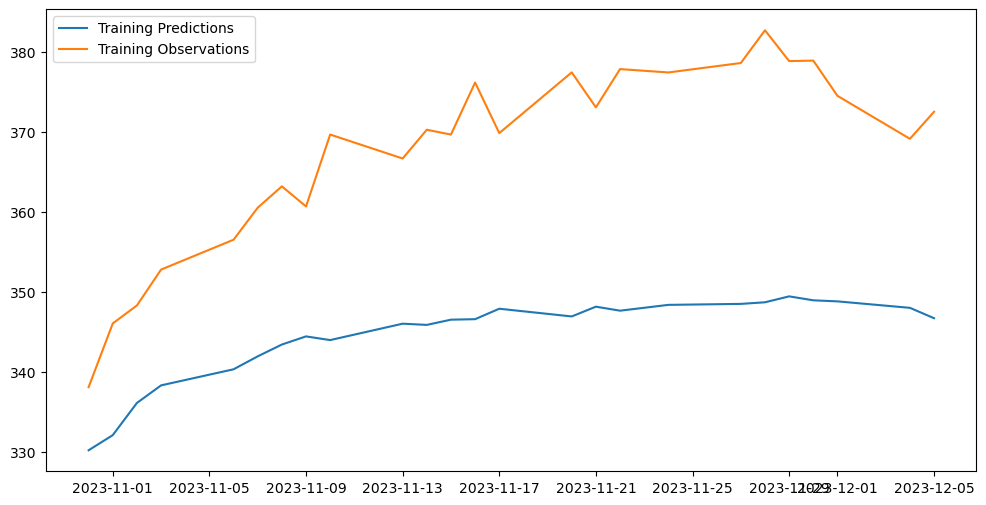

In [48]:
# Validation prediction

val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(12,6))   # this has to be set before other plot commands
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 14ms/step


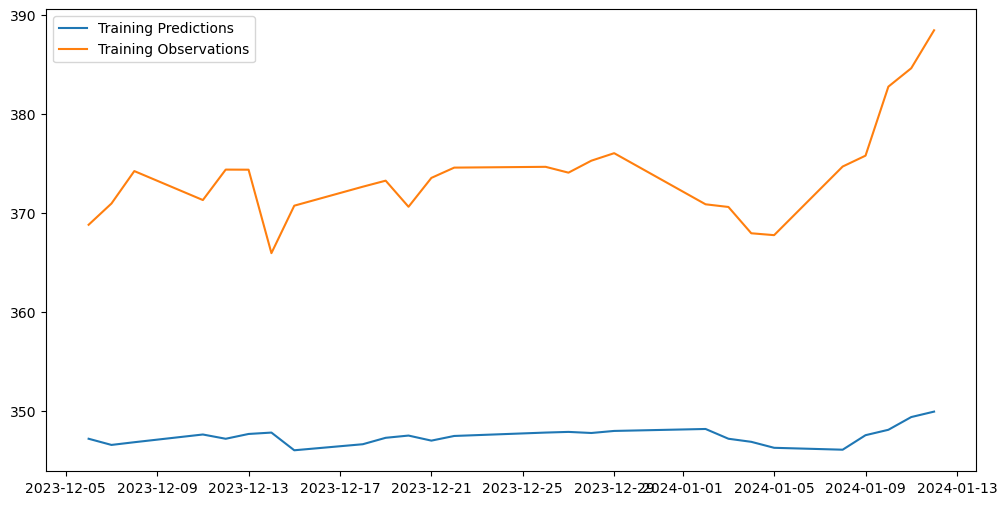

In [47]:
# Test prediction

test_predictions = model.predict(X_test).flatten()
plt.figure(figsize=(12,6))   # this has to be set before other plot commands
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.legend(['Training Predictions', 'Training Observations'])

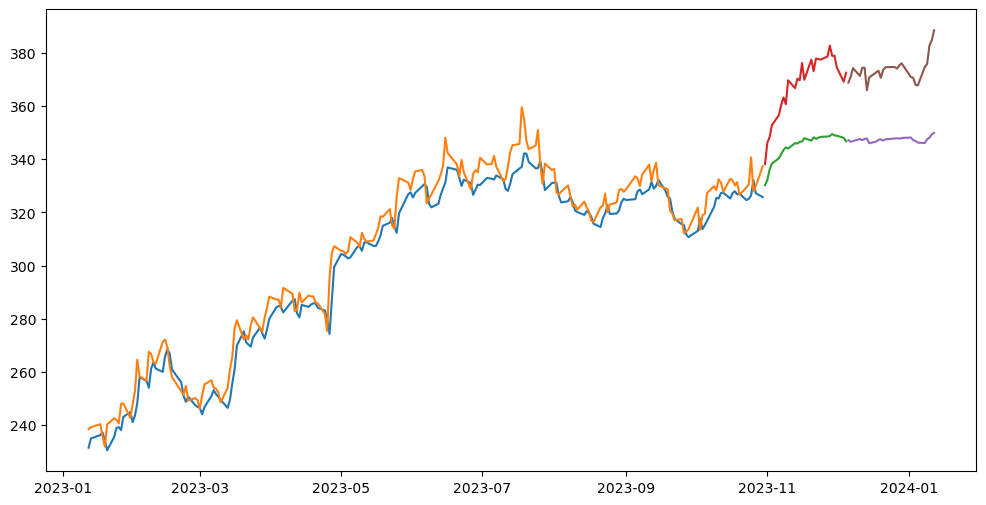

In [46]:
# plotting train, val, and test together
plt.figure(figsize=(12,6))   # this has to be set before other plot commands

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)


